In [1]:
import pandas as pd
import numpy as np
import itertools as it
import os

In [2]:
review = pd.read_csv("yelp_review.csv")

In [3]:
business = pd.read_csv("yelp_business.csv")

In [4]:
user = pd.read_csv("yelp_user.csv")

In [5]:
review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [6]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [7]:
user.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,JJ-aSuM4pCFPdkfoZ34q0Q,Chris,10,2013-09-24,"0njfJmB-7n84DlIgUByCNw, rFn3Xe3RqHxRSxWOU19Gpg...",0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,uUzsFQn_6cXDh6rPNGbIFA,Tiffy,1,2017-03-02,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
2,mBneaEEH5EMyxaVyqS-72A,Mark,6,2015-03-13,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,W5mJGs-dcDWRGEhAzUYtoA,Evelyn,3,2016-09-08,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,4E8--zUZO1Rr1IBK4_83fg,Lisa,11,2012-07-16,None,4,0,0,0,None,...,0,0,0,0,0,0,0,0,1,0


In [8]:
business = business[business['city'] == 'Toronto']

In [9]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Yonge and Eglinton,"""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,Italian;French;Restaurants
20,lHYiCS-y8AFjUitv6MGpxg,"""Starbucks""",Liberty Village,"""85 Hanna Avenue""",Toronto,ON,M6K 3S3,43.639863,-79.419533,4.0,21,1,Food;Coffee & Tea
24,VSGcuYDV3q-AAZ9ZPq4fBQ,"""Sportster's""",The Danforth,"""1430 Danforth Avenue""",Toronto,ON,M4J 1N4,43.682867,-79.326964,2.5,7,1,Bars;Sports Bars;Nightlife
25,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,3.5,39,1,Tiki Bars;Nightlife;Mexican;Restaurants;Bars
27,AtdXq_gu9NTE5rx4ct_dGg,"""DAVIDsTEA""",Ryerson,"""10 Dundas Street E""",Toronto,ON,M5B 2G9,43.656729,-79.380718,4.0,6,1,Coffee & Tea;Food;Tea Rooms


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns 

In [11]:
business['categories'] = business['categories'].str.lower()
selected_categories = ['restaurant', 'food', 'breakFast', 'pizza', 'burgers', 'diner', 'lunch', 'mexican', 'seafood', 'italian']
selected_categories = selected_categories + ['chinese', 'indian', 'korean', 'asian', 'sushi', 'brunch', 'cafe', 'thai']
selected_categories = selected_categories + ['sandwich', 'bake', 'bagels']

In [12]:
business['categories'].head()

15                      italian;french;restaurants
20                               food;coffee & tea
24                      bars;sports bars;nightlife
25    tiki bars;nightlife;mexican;restaurants;bars
27                     coffee & tea;food;tea rooms
Name: categories, dtype: object

In [13]:
business_restaurant = business[business['categories'].str.contains('restaurant')]
business_selected = pd.DataFrame(columns = list(business.columns.values))
for i in range(0,len(selected_categories)):
    df = business[business['categories'].str.contains(selected_categories[i])]
    business_selected = business_selected.append(df)
business_selected = business_selected.drop_duplicates()
business_selected.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
15,l09JfMeQ6ynYs5MCJtrcmQ,"""Alize Catering""",Yonge and Eglinton,"""2459 Yonge St""",Toronto,ON,M4P 2H6,43.711399,-79.399339,3.0,12,0,italian;french;restaurants
25,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""",Leslieville,"""1058 Gerrard Street E""",Toronto,ON,M4M 3A6,43.669256,-79.335902,3.5,39,1,tiki bars;nightlife;mexican;restaurants;bars
30,nbhBRhZtdaZmMMeb2i02pg,"""Sunnyside Grill""",NaN,"""2777 Steeles Avenue W""",Toronto,ON,M3J 3K5,43.781816,-79.490433,5.0,3,1,restaurants;breakfast & brunch
33,FXHfcFVEfI1vVngW2gVOpw,"""Bampot House of Tea & Board Games""",NaN,"""201 Harbord Street""",Toronto,ON,M5S 1H6,43.661582,-79.408878,4.0,55,1,coffee & tea;restaurants;food;mediterranean;te...
86,VXH7zXcZzXlmAVN8GSjGRQ,"""Thai Express""",NaN,"""4700 Keele Street""",Toronto,ON,M3J 1P3,43.774878,-79.494619,3.0,5,1,imported food;specialty food;thai;ethnic food;...


In [14]:
business_selected.shape

(9183, 13)

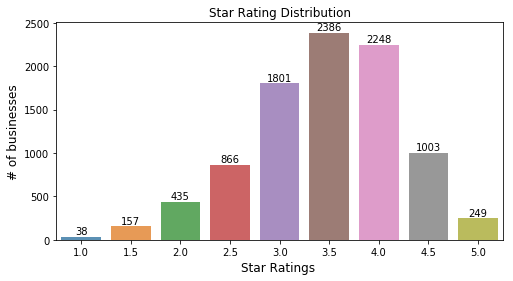

In [15]:
#Get the distribution of the ratings
x=business_selected['stars'].value_counts()
x=x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

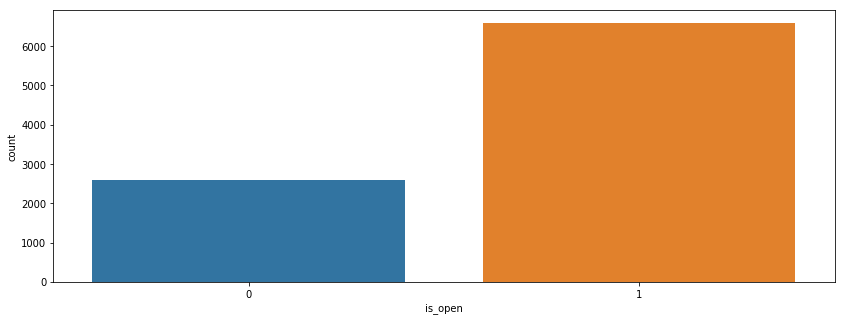

In [16]:
plt.figure(figsize=(14,5))
sns.countplot(business_selected['is_open'])

In [17]:
# What are the popular business categories?
business_cats=' '.join(business_selected['categories'])

cats=pd.DataFrame(business_cats.split(';'),columns=['category'])
x=cats.category.value_counts()
print("There are ",len(x)," different types/categories of Businesses in Yelp!")

There are  3172  different types/categories of Businesses in Yelp!


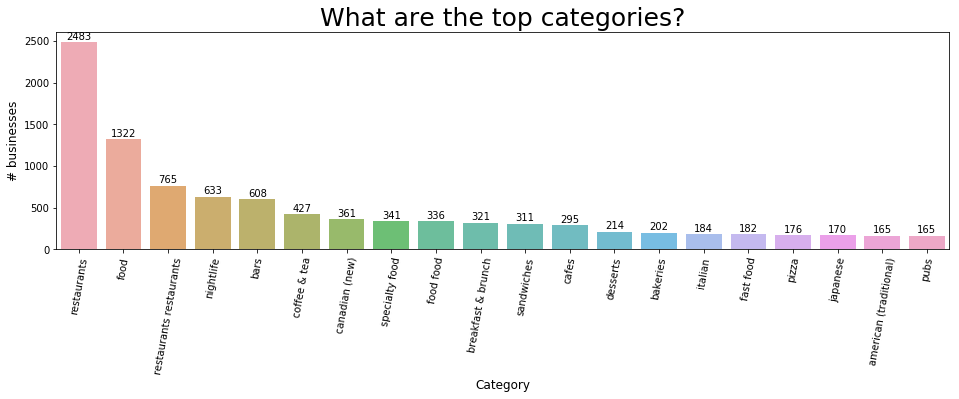

In [18]:
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)#,color=color[5])
plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

Maximum number of category 16
Median category of business 3.0


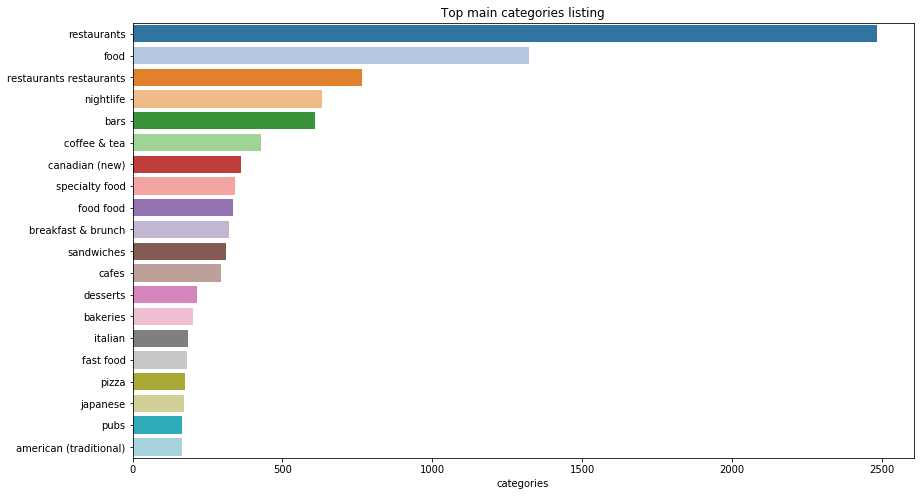

In [19]:
print('Maximum number of category',business_selected['categories'].str.split(';').str.len().max())
print('Median category of business',business_selected['categories'].str.split(';').str.len().median())
corpus = ' '.join(business_selected['categories'])

corpus = pd.DataFrame(corpus.split(';'),columns=['categories'])
cnt = corpus['categories'].value_counts().to_frame()[:20]
plt.figure(figsize=(14,8))
sns.barplot(cnt['categories'], cnt.index, palette = 'tab20')
plt.title('Top main categories listing');

8693

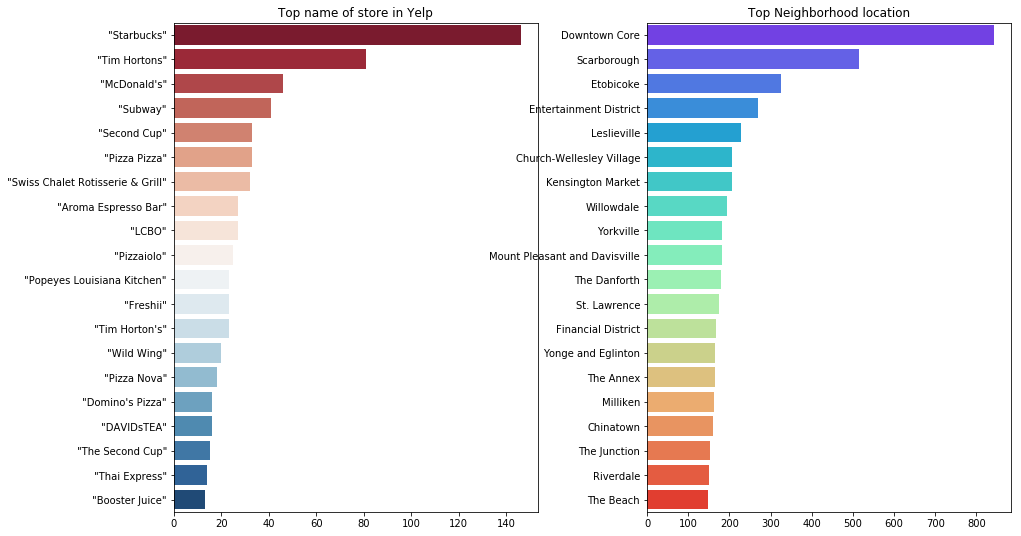

In [20]:
import gc
f,ax = plt.subplots(1,2, figsize=(15,9))
ax1,ax2, = ax.flatten()
cnt = business_selected['name'].value_counts()[:20].to_frame()

sns.barplot(cnt['name'], cnt.index, palette = 'RdBu', ax =ax1)
ax1.set_xlabel('')
ax1.set_title('Top name of store in Yelp')

cnt = business_selected['neighborhood'].value_counts()[:20].to_frame()

sns.barplot(cnt['neighborhood'], cnt.index, palette = 'rainbow', ax =ax2)
ax2.set_xlabel('')
ax2.set_title('Top Neighborhood location')
plt.subplots_adjust(wspace=0.3)
gc.collect()

Median review count 15.0


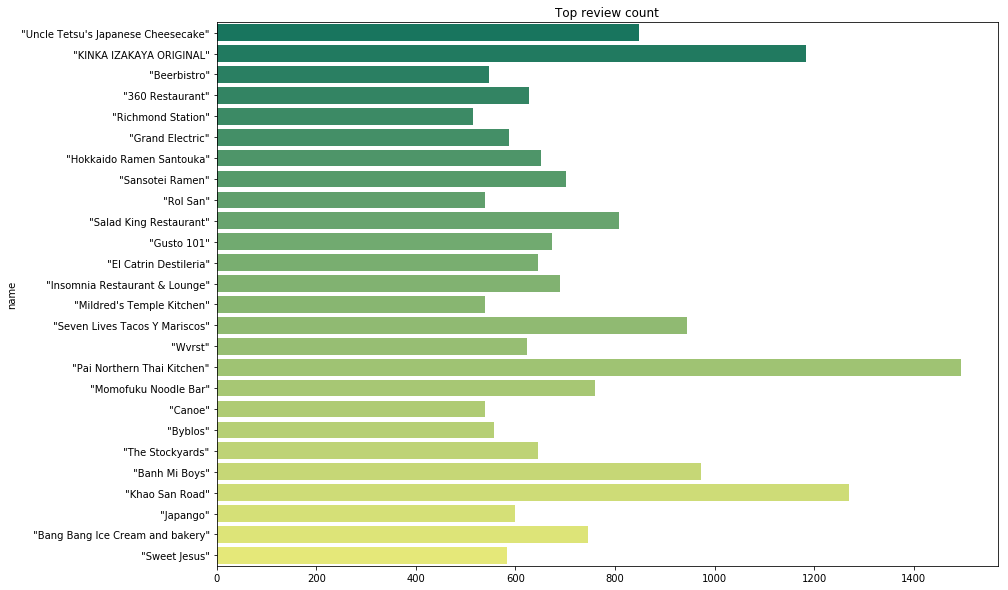

In [21]:
print('Median review count',business_selected['review_count'].median())
plt.figure(figsize = (14,10))
sns.barplot(business_selected[business_selected['review_count'] >500]['review_count'],
            business_selected[business_selected['review_count'] >500]['name'], palette = 'summer')
plt.xlabel('')
plt.title('Top review count');

## How businesses are getting reviewed over time

In [24]:
business_selected[business_selected['review_count'] >1000]

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
9526,RtUvSWO_UZ8V3Wpj0n077w,"""KINKA IZAKAYA ORIGINAL""",Downtown Core,"""398 Church St""",Toronto,ON,M5B 2A2,43.660524,-79.378927,4.0,1184,1,tapas bars;japanese;nightlife;tapas/small plat...
107580,r_BrIgzYcwo1NAuG9dLbpg,"""Pai Northern Thai Kitchen""",Entertainment District,"""18 Duncan Street""",Toronto,ON,M5H 3G8,43.647866,-79.388642,4.5,1494,1,food;ethnic food;specialty food;restaurants;thai
158973,aLcFhMe6DDJ430zelCpd2A,"""Khao San Road""",Entertainment District,"""11 Charlotte St""",Toronto,ON,M5V 2H5,43.646411,-79.393480,4.0,1270,1,thai;restaurants


In [27]:
business_ids = ['RtUvSWO_UZ8V3Wpj0n077w',
                'r_BrIgzYcwo1NAuG9dLbpg',
                'aLcFhMe6DDJ430zelCpd2A'
]

In [28]:
business_names = ["KINKA IZAKAYA ORIGINAL",
                  "Pai Northern Thai Kitchen",
                  "Khao San Road"
]

In [30]:
review.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,vkVSCC7xljjrAI4UGfnKEQ,bv2nCi5Qv5vroFiqKGopiw,AEx2SYEUJmTxVVB18LlCwA,5,2016-05-28,Super simple place but amazing nonetheless. It...,0,0,0
1,n6QzIUObkYshz4dz2QRJTw,bv2nCi5Qv5vroFiqKGopiw,VR6GpWIda3SfvPC-lg9H3w,5,2016-05-28,Small unassuming place that changes their menu...,0,0,0
2,MV3CcKScW05u5LVfF6ok0g,bv2nCi5Qv5vroFiqKGopiw,CKC0-MOWMqoeWf6s-szl8g,5,2016-05-28,Lester's is located in a beautiful neighborhoo...,0,0,0
3,IXvOzsEMYtiJI0CARmj77Q,bv2nCi5Qv5vroFiqKGopiw,ACFtxLv8pGrrxMm6EgjreA,4,2016-05-28,Love coming here. Yes the place always needs t...,0,0,0
4,L_9BTb55X0GDtThi6GlZ6w,bv2nCi5Qv5vroFiqKGopiw,s2I_Ni76bjJNK9yG60iD-Q,4,2016-05-28,Had their chocolate almond croissant and it wa...,0,0,0


In [36]:
review["date"]=  pd.to_datetime(review["date"], format='%Y-%m-%d')
review['year'] = review.date.dt.year

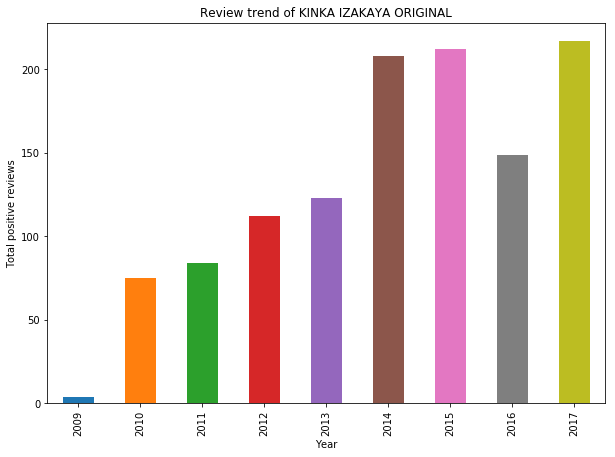

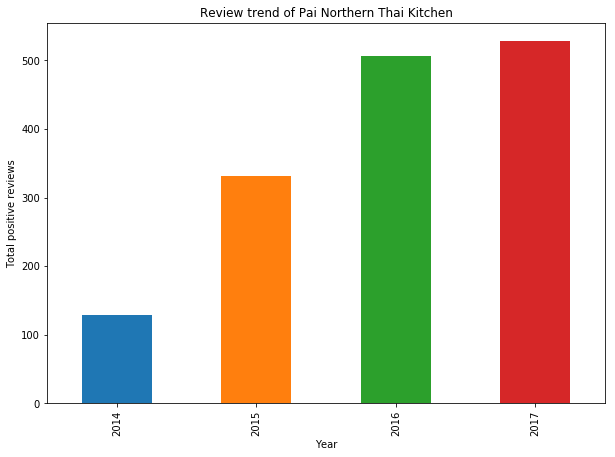

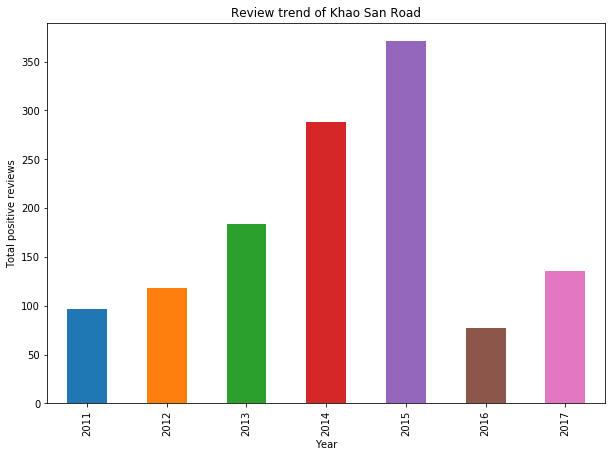

In [37]:
for i, business_id in enumerate(business_ids):
    
    useful_b = review.loc[review['business_id'] == business_id]
    
    useful_b = useful_b.groupby(['year']).size().reset_index(name='counts')
    
    #print(useful_b.head())
    series = pd.Series(useful_b["counts"].values, index=useful_b["year"].values, name='Review trend')
    
    axes = series.plot(kind="bar",figsize=(10, 7))
    
    plt.xlabel('Year', axes=axes)
    
    plt.ylabel('Total positive reviews', axes=axes)
    
    plt.title('Review trend of {}'.format(business_names[i]), axes=axes)
    
    plt.show()

In [43]:
#get all ratings data
rating_data=business[['latitude','longitude','stars','review_count']]

In [45]:
import folium
import folium.plugins as plugins

In [47]:
data=[]

#rearranging data to suit the format needed for folium
stars_list=list(rating_data['stars'].unique())


for star in stars_list:
    subset=ratings_data_vegas[ratings_data_vegas['stars']==star]
    data.append(subset[['latitude','longitude']].values.tolist())
    
    
#initialize at Toronto
lat = 43.6532
lon = 79.3832

zoom_start=11

print("                     Toronto Review heatmap Animation ")

# basic map
m = folium.Map(location=[lat, lon], tiles="OpenStreetMap", zoom_start=zoom_start)


#inprovising the Heatmapwith time plugin to show variations across star ratings 
hm = plugins.HeatMapWithTime(data,max_opacity=0.3,auto_play=True,display_index=True,radius=7)

hm.add_to(m)
m

                     Toronto Review heatmap Animation 
